In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [170]:
df = pd.read_csv('battles.csv')

In [171]:
df

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [172]:
#Replace strings with numbers
df.attacker_outcome.replace('win',1,inplace=True)
df.attacker_outcome.replace('loss',0,inplace=True)
df.attacker_outcome.fillna(0,inplace=True)

In [140]:
#df = df.dropna(axis = 0, subset = ["attacker_size", "defender_size", "attacker_outcome"])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

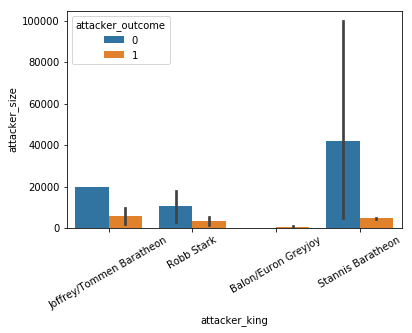

In [173]:
#Attacker kings army size and outcome
sns.barplot(x='attacker_king', y='attacker_size', hue='attacker_outcome', data=battles)
plt.xticks(rotation=30)

In [166]:
df_win_attking=battles[['attacker_king', 'attacker_outcome']]


df_win_attking = df.loc[df['attacker_outcome'] == 1]
df_los_attking = df.loc[df['attacker_outcome'] == 0]
df_win_defking = df.loc[df['attacker_outcome'] == 0]
df_los_defking = df.loc[df['attacker_outcome'] == 1]

In [ ]:
# ttest for whether being on the attack or defense is statsitically significant.


In [135]:
stats.ttest_ind(df_win_attking['attacker_size'], df_los_attking['attacker_size'], equal_var = False)

c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Ttest_indResult(statistic=nan, pvalue=nan)

Not statstically siginificant p > .05

In [157]:
# What is my test group?
# What is my control group?
# Success Metric: wins for attacker king: success metric is attacker_outcome = 1
print('test size:', len(df[df.attacker_outcome==1]))
print('test proportion:', df.attacker_outcome.mean())

test size: 29
test proportion: 0.828571428571


In [176]:
#df['stark_attack'] = df[df['attacker_king']=='Robb Stark']

df['stark_attack'] = np.where(df['attacker_king']=='Robb Stark', 1, 0)
df['lannister_attack'] = np.where(df['attacker_king']=='Joffrey/Tommen Baratheon', 1, 0)
df['greyjoy_attack'] = np.where(df['attacker_king']=='Balon/Euron Greyjoy', 1, 0)
df['stannis_attack'] = np.where(df['attacker_king']=='Stannis Baratheon', 1, 0)
df['stark_defense'] = np.where(df['defender_king']=='Robb Stark', 1, 0)
df['lannister_defense'] = np.where(df['defender_king']=='Joffrey/Tommen Baratheon', 1, 0)
df['greyjoy_defense'] = np.where(df['defender_king']=='Balon/Euron Greyjoy', 1, 0)
df['stannis_defense'] = np.where(df['defender_king']=='Stannis Baratheon', 1, 0)

In [187]:
# Robb Stark  attack vs. defense
stats.ttest_ind(df[df.stark_attack==1].attacker_outcome, df[df.stark_defense==0].attacker_outcome)

Ttest_indResult(statistic=-0.98408386463328335, pvalue=0.33531384562343414)

In [188]:
# Lanniseter  attack vs. defense
stats.ttest_ind(df[df.lannister_attack==1].attacker_outcome, df[df.lannister_defense==1].attacker_outcome)

Ttest_indResult(statistic=1.5000000000000004, pvalue=0.14665564606820053)

In [189]:
# Greyjoy attack vs. defense
stats.ttest_ind(df[df.greyjoy_attack==1].attacker_outcome, df[df.greyjoy_defense==1].attacker_outcome)

c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Ttest_indResult(statistic=nan, pvalue=nan)

In [190]:
# Stannis attack vs. defense
stats.ttest_ind(df[df.stannis_attack==1].attacker_outcome, df[df.stannis_defense==1].attacker_outcome)

Ttest_indResult(statistic=-1.4638501094227996, pvalue=0.20311066372005501)

## For Stannis looks like it is statistically significant for him to start attacking more!

In [191]:
df[df.stannis_attack==1].attacker_outcome

15    1
19    0
25    0
27    1
34    0
Name: attacker_outcome, dtype: int64

In [192]:
df[df.stannis_defense==1].attacker_outcome

30    1
31    1
Name: attacker_outcome, dtype: int64

## The Problem

Stannis Baratheon is tired of losing battles. How can he win more battles? Losing battles results in loss of soldiers therefore weakening his army and chances of ruling the seven kingdoms. When interviewed, soldiers felt they came to defeat because they were caught off guard.

## The Potential Solution

Being on the attacking side will increase chances of winning battles as the defending army is caught off guard and is ill prepared for a victory.

## The method of testing the solution

Battle Scientists will study all army's with soldiers of 5000 to 10,000 of 1 years (Year 299 to Year 300). Army's will be randomly selected as 'attackers' or 'defenders' matched together with army's of similiar size. The variable of interest is victory of 'attackers' and 'defenders'.

We will compute victory rate for the previous year before the study (Year 298 to 299) and compare it to victory rate in 'attackers' and 'defenders' for the year during the study.

If victory for attackers in the year of study increases by X% (need t-test to figure this out?) then we can conclude that being the 'attacker' is effective and plan more attacks rather than stay at dragonstone and defend the land. If victory in the year of study decreases by less than one standard deviation, observe for another 2 months. If victories do not increase, then go back to dragonstone and continue to defend.